In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import mpl_axes_aligner
from pca import pca
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
import yellowbrick.cluster
from yellowbrick.cluster import KElbowVisualizer
import flexcluster
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

# Exploratory data analysis
1. Loading the data
2. Check column names, sample size  
3. display first 3 columns of data

In [2]:
data=pd.read_csv("D:\\fenny\\mcdonalds.csv")

In [3]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
data.shape

(1453, 15)

In [5]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
df=data.iloc[:,0:11]
df= df.replace({'No': 0, 'Yes': 1}).astype(int)
round(df.mean(),2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [7]:
model = PCA(n_components=11)
X_pca = model.fit_transform(df)


In [8]:
pca_data=pd.DataFrame(X_pca,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
pca_data


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [9]:
pca_std=pd.DataFrame(np.std(pca_data),columns=["Standard Deviation"])
pca_std

,Standard Deviation
PCA1,0.756789
PCA2,0.607246
PCA3,0.504446
PCA4,0.398661
PCA5,0.337289
PCA6,0.310168
PCA7,0.289598
PCA8,0.275027
PCA9,0.265160
PCA10,0.248756


In [10]:
DF_prop=pd.DataFrame(model.explained_variance_ratio_,index=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"],columns=["Proportion of Variance"])
DF_prop

,Proportion of Variance
PCA1,0.299447
PCA2,0.192797
PCA3,0.133045
PCA4,0.083096
PCA5,0.059481
PCA6,0.050300
PCA7,0.043849
PCA8,0.039548
PCA9,0.036761
PCA10,0.032353


In [11]:
out_sum = np.cumsum(model.explained_variance_ratio_) 
DF_CUM=pd.DataFrame(out_sum.T,index=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"],columns=["Cumulative Proportion"])
DF_CUM

,Cumulative Proportion
PCA1,0.299447
PCA2,0.492244
PCA3,0.625290
PCA4,0.708386
PCA5,0.767866
PCA6,0.818166
PCA7,0.862015
PCA8,0.901563
PCA9,0.938323
PCA10,0.970677


In [12]:
loadings_df = pd.DataFrame(model.components_.T, columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"],index=df.columns)
loadings_df
loadings=model.components_

In [13]:
dfScores   = pd.DataFrame(X_pca,columns=['PC'+str(i) for i in range(1,df.shape[1]+1)])
dfScores 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [14]:
dfLoadings = pd.DataFrame(model.components_,columns=df.columns,index=dfScores.columns)
dfLoadings

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
PC1,-0.476933,-0.155332,-0.006356,0.116232,0.304443,-0.108493,-0.337186,-0.471514,0.329042,-0.213711,0.374753
PC2,0.363790,0.016414,0.018809,-0.034094,-0.063839,-0.086972,-0.610633,0.307318,0.601286,0.076593,-0.139656
PC3,-0.304444,-0.062515,-0.037019,-0.322359,-0.802373,-0.064642,-0.149310,-0.287265,0.024397,0.192051,-0.088571
PC4,0.055162,-0.142425,0.197619,-0.354139,0.253960,-0.097363,0.118958,-0.002547,0.067816,0.763488,0.369539
PC5,-0.307535,0.277608,0.070620,-0.073405,0.361399,0.107930,-0.128973,-0.210899,-0.003125,0.287846,-0.729209
PC6,0.170738,-0.347830,-0.355087,-0.406515,0.209347,-0.594632,-0.103241,-0.076914,-0.261342,-0.178226,-0.210878
PC7,-0.280519,-0.059738,0.707637,-0.385943,0.036170,-0.086846,-0.040449,0.360453,-0.068385,-0.349616,-0.026792
PC8,0.013041,-0.113079,0.375934,0.589622,-0.138241,-0.627799,0.140060,-0.072792,0.029539,0.176303,-0.167181
PC9,0.572403,-0.018465,0.400280,-0.160512,-0.002847,0.166197,0.076069,-0.639086,0.066996,-0.185572,-0.072483
PC10,-0.110284,-0.665818,-0.075634,-0.005338,0.008707,0.239532,0.428087,0.079184,0.454399,-0.038117,-0.289592


In [15]:
pca_scores = PCA().fit_transform(df)

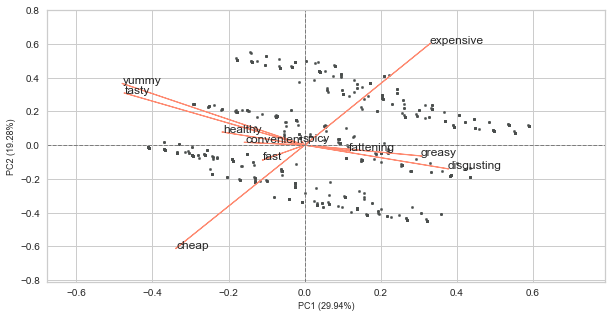

In [16]:
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(model.explained_variance_ratio_[0]*100, 2),
var2=round(model.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

In [17]:
x=df.values
from sklearn.cluster import KMeans
wcss = [] 
for i in range(2, 8): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,max_iter=10)
    cluster=kmeans.fit_predict(df) 
    wcss.append(kmeans.inertia_)

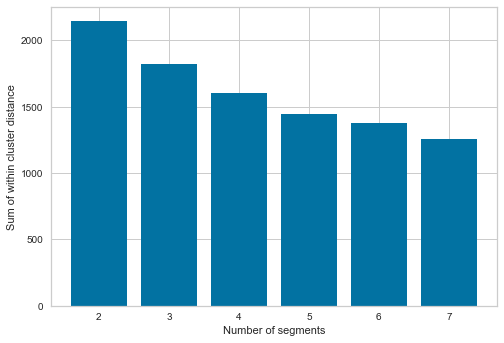

In [18]:
plt.bar(range(2, 8), wcss)
plt.xlabel('Number of segments')
plt.ylabel('Sum of within cluster distance') 
plt.show()

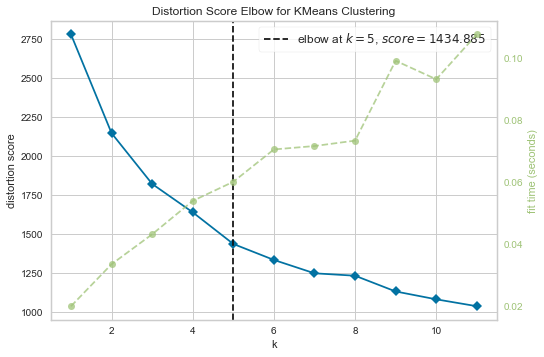

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
#Extracting segments


model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df)
visualizer.show()

In [20]:
#K-means clustering

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[2 1 1 ... 1 3 0]
1603.0165988904646
6
[[0.02083333 0.67916667 0.075      0.91666667 0.70833333 0.74166667
  0.06666667 0.07916667 0.89583333 0.0625     0.725     ]
 [0.87619048 0.95873016 0.13650794 0.9047619  0.60634921 0.85714286
  0.10793651 0.93015873 0.92063492 0.20634921 0.10793651]
 [0.0188172  0.90860215 0.08602151 0.91397849 0.58602151 0.95698925
  0.89516129 0.30107527 0.01344086 0.07526882 0.32258065]
 [0.97908745 0.98098859 0.08174905 0.78897338 0.35361217 0.9581749
  0.92585551 0.97338403 0.01901141 0.34410646 0.04752852]]


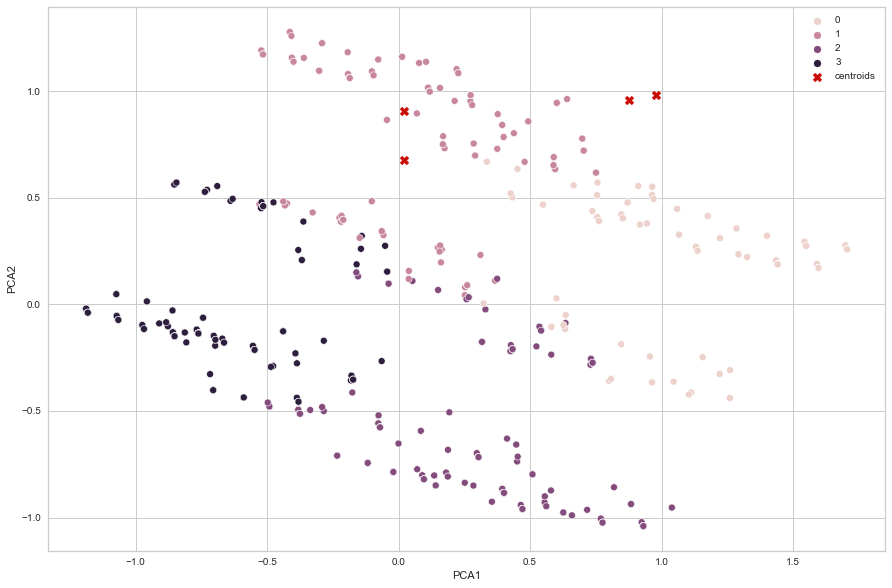

In [21]:
#Visulazing clusters
plt.rcParams['figure.figsize'] = (15, 10)
sns.scatterplot(data=pca_data, x='PCA1', y='PCA2',hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()